<h1 align ='center'>Calculating Galaxy Distance Using Spectra </h1>
<h5 align = 'center'> 
    Author: K M Shariat Ullah  <br>
    Student, Electrical and Electronic Engineering, <br>
    Shahjalal University of Science and Technology <br>
    E-mail: cast.shariat@gmail.com
</h5>


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

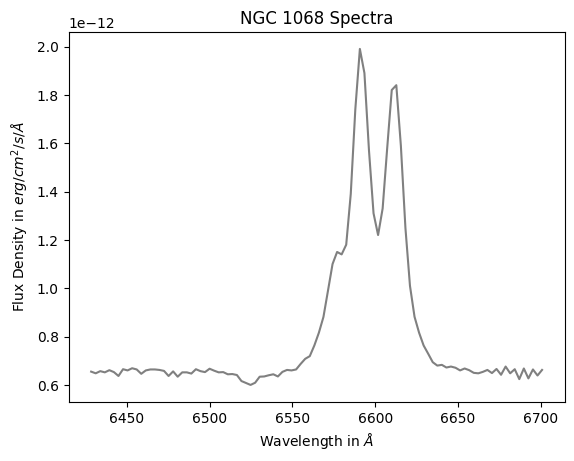

In [29]:
# load dataset
data = pd.read_csv('NGC_1068.csv')

# slicing to get the H alpha line
wave = data.wavelength[1000:1100]         
intensity = data.intensity[1000:1100]

plt.plot(wave, intensity, color='gray')
plt.title('NGC 1068 Spectra')
plt.xlabel('Wavelength in $\\AA$')
plt.ylabel('Flux Density in $erg/cm^2/s/\\AA$')
plt.show()


In [30]:
# finding the red shifted wavelenght at which H alpha line peaks

x = find_peaks(intensity, height=1.9e-12)
print(f"Red Shifted H Alpha Line at: {wave[1000+x[0][0]]} Angstorm with Intensity {intensity[1000+x[0][0]]}")

Red Shifted H Alpha Line at: 6590.74 Angstorm with Intensity 1.99e-12


In [35]:
# calculating red shift value

wave_obs = 6590.74              # angstorm
wave_src = 6562.8               # angstorm

z = (wave_obs-wave_src)/wave_src
print(f"Redshift value z: {z:0.6f}")

# -------------------------
#          constant
# -------------------------

c = 299792458 
H_0 = 72                        # km/s / Mpc
d_act = 13.48                   # Mpc

# calculating receding velocity
v = c * z                       # m/s
v = v / 1000                    # km/s
print(f"Veloocity of NGC 1068: {v:0.2f}")

# calculating distance
d_spectra = v / H_0
print(f"Distance of NGC 1068: {d_spectra:0.2f}")

# calculating error
error = (d_spectra-d_act)/d_act * 100

print(f"Error: {error:0.2f}%")

Redshift value z: 0.004257
Veloocity of NGC 1068: 1276.32
Distance of NGC 1068: 17.73
Error: 31.50%


<h1 align ='center'>Calculating Galaxy Distance Using Density Parameter </h1>
<h5 align = 'center'> 
    Author: K M Shariat Ullah  <br>
    Student, Electrical and Electronic Engineering, <br>
    Shahjalal University of Science and Technology <br>
    E-mail: cast.shariat@gmail.com
</h5>


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.integrate import quad

In [33]:
# ---------------------
#      Constants
# ---------------------
c = 299792458                # m/s                     
H_0 = 72                     # km/s/Mpc
lambda_src = 6562.8          # Rest wavelength of H alpha line
lambda_obs = 6590.74         # Observed wavelength of H alpha line

# Updated matter density parameter (Planck 2018) 
omega_m = 0.3142  
omega_lambda = 0.6858 
omega_k = 0.001 

In [37]:
# red shift
z = (lambda_obs - lambda_src) / lambda_src
print(f"Redshift Value of NGC 1068: {z:.6f}")

# Literature distance of NGC 1068
d_act = 13.48                                       

# advanced cosmological distance calculation using cosmological parameters
def integrand(z_prime, omega_m, omega_lambda, omega_k):
    return 1.0 / np.sqrt(omega_m * (1 + z_prime)**3 + omega_k * (1 + z_prime)**2 + omega_lambda)

d_cosmo, error = quad(integrand, 0, z, args=(omega_m, omega_k, omega_lambda))
d_cosmo = (c / 1000) / H_0 * d_cosmo          
print(f"Advanced Cosmological Distance of NGC 1068: {d_cosmo:.2f} Mpc")

# Error calculation for advanced method
advanced_error = (d_cosmo- d_act) / d_act * 100
print(f"Error with Advanced Cosmology: {advanced_error:.2f} %")

Redshift Value of NGC 1068: 0.004257
Advanced Cosmological Distance of NGC 1068: 17.67 Mpc
Error with Advanced Cosmology: 31.11 %
